<a href="https://colab.research.google.com/github/FranciscoRamirezRuiz/Inferencia2024/blob/main/Entrenamiento_de_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Librerías base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización más clara
sns.set(style="whitegrid")

# Cargar dataset
df = pd.read_csv("Housing.csv")  # Asegúrate de tenerlo subido


In [6]:
# Primeras filas
print(df.head())

# Resumen de tipos y nulos
print(df.info())

# Estadísticas básicas
print(df.describe().T)


           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7229300521  20141013T000000  231300.0         2       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [7]:
df.drop('id',axis=1,inplace=True)
# Eliminar duplicados si los hay
df.drop_duplicates(inplace=True)

In [8]:
def get_year(date):
    return int(str(date)[:4])
df['year'] = df['date'].apply(get_year)
df.drop('date',axis=1,inplace=True)

In [9]:
# Convertir categóricas relevantes
cat_columns = ['waterfront', 'view', 'condition', 'grade', 'zipcode']
df[cat_columns] = df[cat_columns].astype('category')

In [10]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,231300.0,2,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015


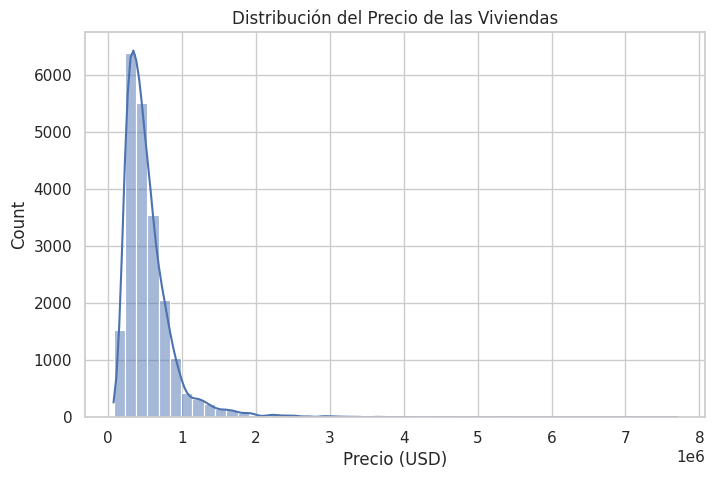

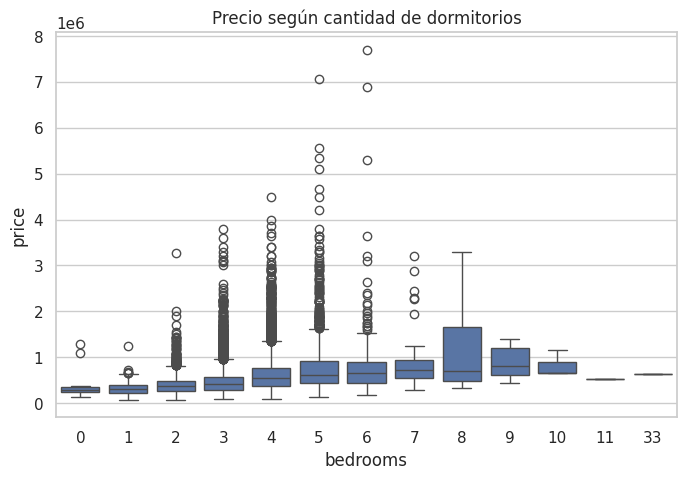

In [11]:
# Histograma de precios
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribución del Precio de las Viviendas')
plt.xlabel('Precio (USD)')
plt.show()

# Boxplot por número de dormitorios
plt.figure(figsize=(8,5))
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('Precio según cantidad de dormitorios')
plt.show()


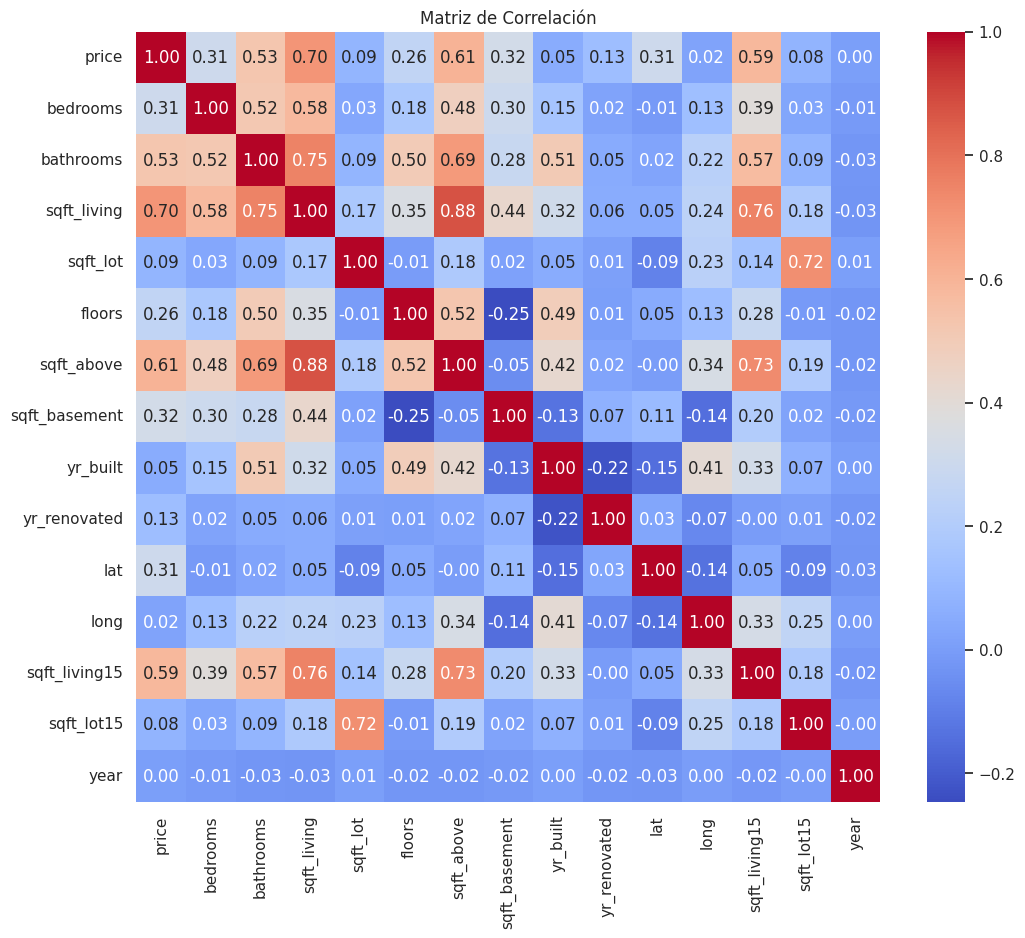

In [12]:
plt.figure(figsize=(12,10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


In [13]:
# Variables seleccionadas (puedes modificar esta lista)
features = ['sqft_living', 'bathrooms','sqft_above', 'sqft_living15']

X = pd.get_dummies(df[features], drop_first=True)
y = df['price']


In [14]:
from sklearn.model_selection import train_test_split

# División del dataset en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# División del dataset (si no lo hiciste antes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Modelo de Regresión Lineal
lr = LinearRegression()
lr.fit(X_train, y_train)

# 2. Modelo de Árbol de Decisión
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)

# 3. Modelo Random Forest con hiperparámetros optimizados
best_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=1,
    random_state=42
)
best_model.fit(X_train, y_train)

# Evaluación de MAE
print(" Comparación de Modelos (MAE en USD):")
print("Regresión Lineal      MAE:", round(mean_absolute_error(y_test, lr.predict(X_test)), 2))
print("Árbol de Decisión     MAE:", round(mean_absolute_error(y_test, dtr.predict(X_test)), 2))
print("Random Forest         MAE:", round(mean_absolute_error(y_test, best_model.predict(X_test)), 2))


 Comparación de Modelos (MAE en USD):
Regresión Lineal      MAE: 175758.74
Árbol de Decisión     MAE: 219839.8
Random Forest         MAE: 167140.48


In [16]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# MAE
mae_lr = mean_absolute_error(y_test, lr.predict(X_test))
mae_dtr = mean_absolute_error(y_test, dtr.predict(X_test))
mae_rf = mean_absolute_error(y_test, best_model.predict(X_test))

# RMSE
rmse_lr = np.sqrt(mean_squared_error(y_test, lr.predict(X_test)))
rmse_dtr = np.sqrt(mean_squared_error(y_test, dtr.predict(X_test)))
rmse_rf = np.sqrt(mean_squared_error(y_test, best_model.predict(X_test)))

# R²
r2_lr = r2_score(y_test, lr.predict(X_test))
r2_dtr = r2_score(y_test, dtr.predict(X_test))
r2_rf = r2_score(y_test, best_model.predict(X_test))


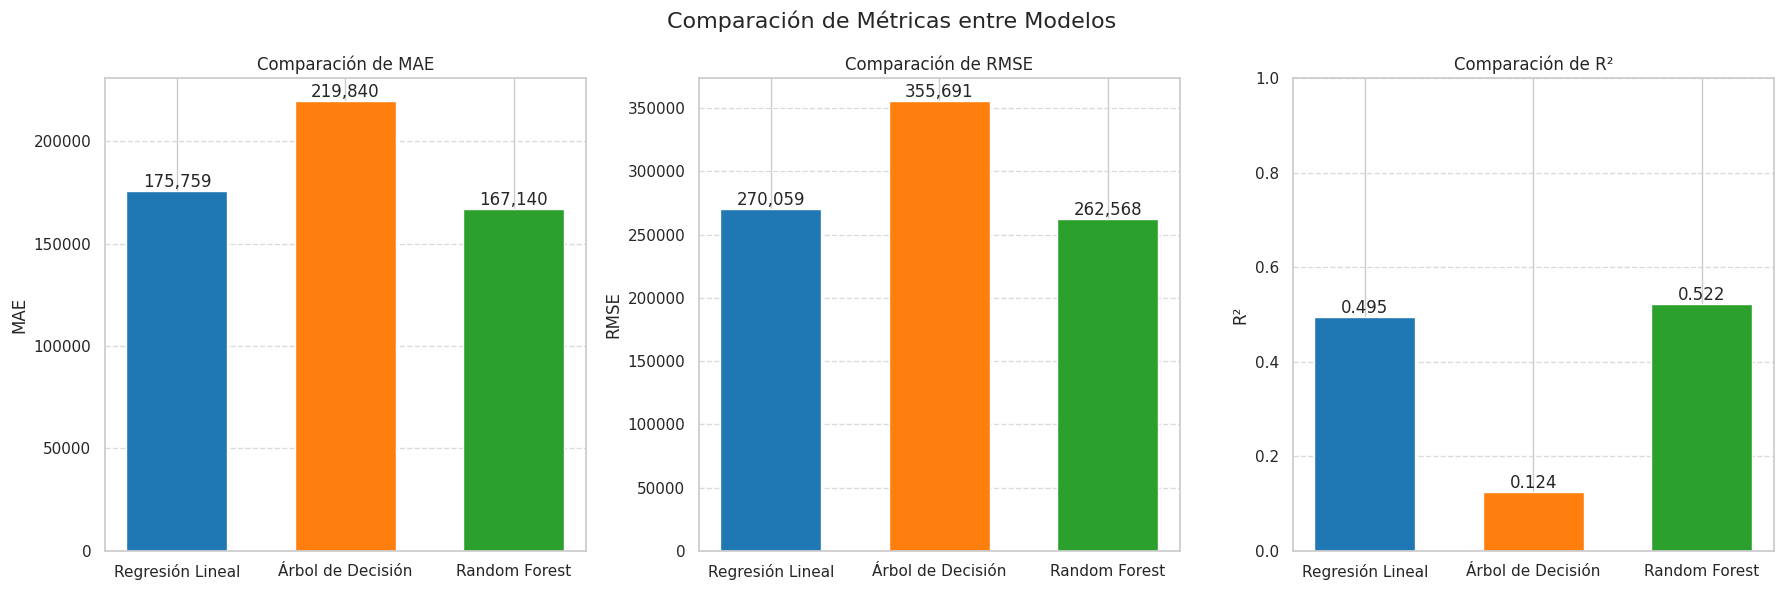

In [17]:
import matplotlib.pyplot as plt

# Nombres de los modelos
models = ['Regresión Lineal', 'Árbol de Decisión', 'Random Forest']

# Métricas
mae_scores = [mae_lr, mae_dtr, mae_rf]
rmse_scores = [rmse_lr, rmse_dtr, rmse_rf]
r2_scores = [r2_lr, r2_dtr, r2_rf]

# Crear subgráficos
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

bar_width = 0.6
x_pos = np.arange(len(models))

# MAE
axes[0].bar(x_pos, mae_scores, bar_width, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(models)
axes[0].set_ylabel('MAE')
axes[0].set_title('Comparación de MAE')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
for i, score in enumerate(mae_scores):
    axes[0].text(x_pos[i], score, f'{score:,.0f}', ha='center', va='bottom')

# RMSE
axes[1].bar(x_pos, rmse_scores, bar_width, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(models)
axes[1].set_ylabel('RMSE')
axes[1].set_title('Comparación de RMSE')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
for i, score in enumerate(rmse_scores):
    axes[1].text(x_pos[i], score, f'{score:,.0f}', ha='center', va='bottom')

# R²
axes[2].bar(x_pos, r2_scores, bar_width, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[2].set_xticks(x_pos)
axes[2].set_xticklabels(models)
axes[2].set_ylabel('R²')
axes[2].set_ylim(0, 1)
axes[2].set_title('Comparación de R²')
axes[2].grid(axis='y', linestyle='--', alpha=0.7)
for i, score in enumerate(r2_scores):
    axes[2].text(x_pos[i], score, f'{score:.3f}', ha='center', va='bottom')

plt.suptitle('Comparación de Métricas entre Modelos', fontsize=16)
plt.tight_layout()
plt.show()


In [18]:
# Generar predicciones con el conjunto de prueba
y_pred = best_model.predict(X_test)


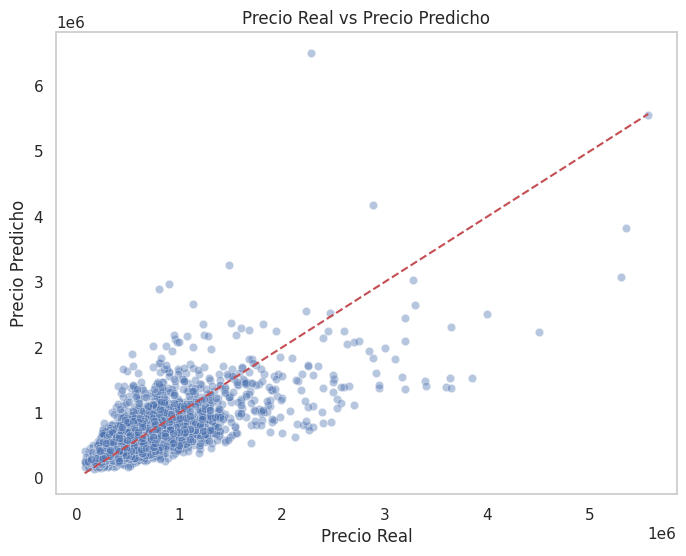

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Precio Real vs Precio Predicho")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid()
plt.show()


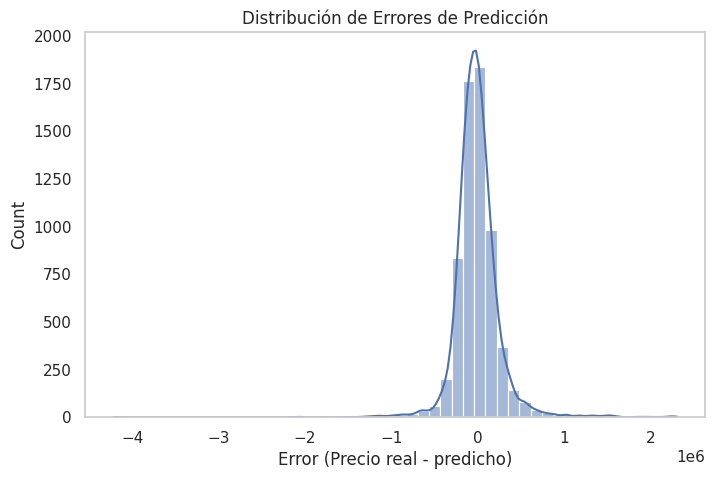

In [20]:
errores = y_test - y_pred

plt.figure(figsize=(8,5))
sns.histplot(errores, bins=50, kde=True)
plt.title("Distribución de Errores de Predicción")
plt.xlabel("Error (Precio real - predicho)")
plt.grid()
plt.show()


In [21]:
import numpy as np

# Simulación bootstrap para el MAE
mae_values = []
np.random.seed(42)

for _ in range(1000):
    sample = np.random.choice(range(len(y_test)), len(y_test), replace=True)
    sample_mae = np.mean(np.abs(y_test.values[sample] - y_pred[sample]))
    mae_values.append(sample_mae)

# Intervalo de confianza al 95%
lower = np.percentile(mae_values, 2.5)
upper = np.percentile(mae_values, 97.5)

print(f"Intervalo de confianza del MAE al 95%: {lower:,.2f} a {upper:,.2f}")


Intervalo de confianza del MAE al 95%: 162,816.75 a 172,358.58


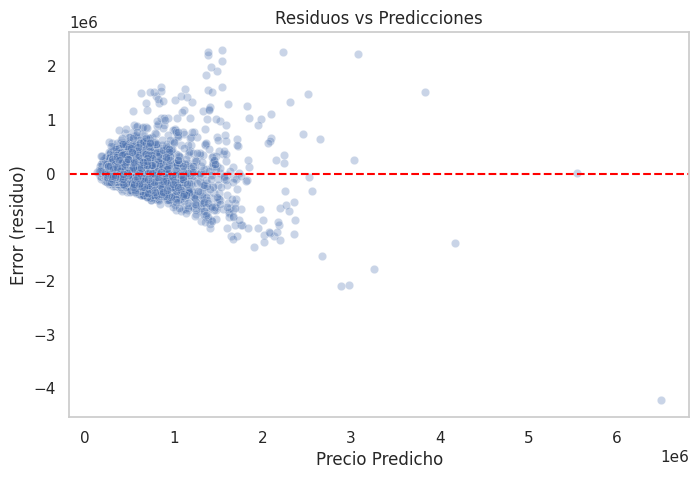

In [22]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=errores, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuos vs Predicciones")
plt.xlabel("Precio Predicho")
plt.ylabel("Error (residuo)")
plt.grid()
plt.show()
